In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("seaborn-colorblind")

import sys
import pandas as pn
sys.path.append("../pynoddy")

import pynoddy
import pynoddy.history
import pynoddy.output
import pynoddy.events
import pynoddy.experiment

import importlib

sys.path.append("../gempy")

import gempy as gp

In [2]:
cs = 25.
history = "m1.his"
output = "m1_out"

In [22]:
nm = pynoddy.history.NoddyHistory()
# set model extent
nm.set_extent(3000.,3000,2000.)
# set model origin x,y,z
nm.set_origin(0.,0.,2000.)
# set model cube size
nm.change_cube_size(cs)

# stratigraphic event
strati_options = {
    'num_layers' : 6,
    'layer_names' : ['6','5','4','3','2','1'],
    'layer_thickness' : [0, 100, 300,300,300,300]
}
nm.add_event('stratigraphy', strati_options)

# tilt event
tilt_options = {
    "name": "tilt1",
    "pos": (1500,0,1000),
    "rotation": -15.,
    "plunge_direction": 0.,
    "plunge": 0.
}
# nm.add_event("tilt", tilt_options)

# for i in [250,400,550,700]:

fold_options = {
    "name": "fold1",
    "pos": (750,0,2000),
    "amplitude": 250.,
    "wavelength": 3000.,
}
nm.add_event("fold", fold_options)

fold2_options = {
    "name": "fold2",
    "pos": (0,2250,2000),
    "dip direction": 180,
    "amplitude": 250.,
    "wavelength": 3000.,
}
nm.add_event("fold", fold2_options)

# fault event
fault_options = {
    "name": "fault1",
    "pos": (1000,0,2000),
    "slip": 400.,
    "dip_dir": 90.,
    "dip": 50.
}
# nm.add_event("fault", fault_options)

# write history file
nm.write_history(history)

In [23]:
m1_ex = pynoddy.experiment.Experiment(history)
m1_ex.set_event_params({3: {"Dip Direction": 180.}})

In [5]:
output_name = "noddy_temp"
# nh = pynoddy.history.NoddyHistory(history)
pynoddy.compute_model(history, output_name, sim_type="TOPOLOGY")

''

In [7]:
nfb = pynoddy.experiment.load_noddy_fault_block((120, 120, 80), output_name)

In [8]:
fault_interf = pynoddy.experiment.export_fault_interface_gempy(nfb, [55, 85], [50], fault=[0], cs=25)

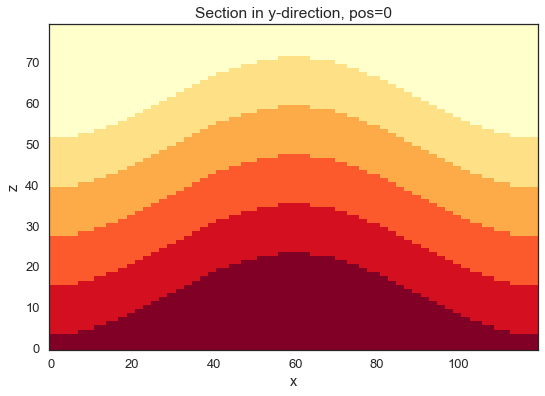

In [24]:
m1_ex.plot_section(direction="y")

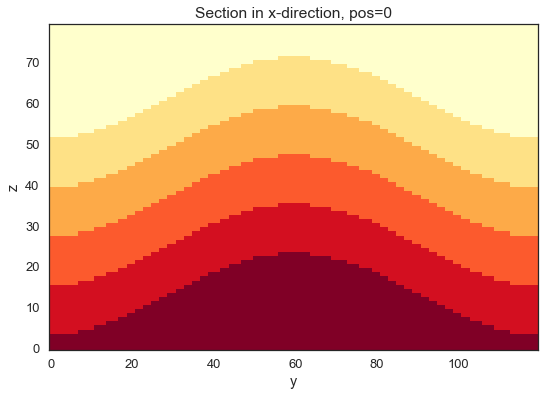

In [25]:
m1_ex.plot_section(direction="x")

In [26]:
x = np.arange(0, 3000, 500)
y = np.arange(0, 3000, 500)

In [27]:
dip_x = np.arange(250, 3000, 500)
dip_y = np.arange(250, 3000, 500)

In [28]:
xs = [250, 1500, 2750]
ys = [250, 1500, 2750]

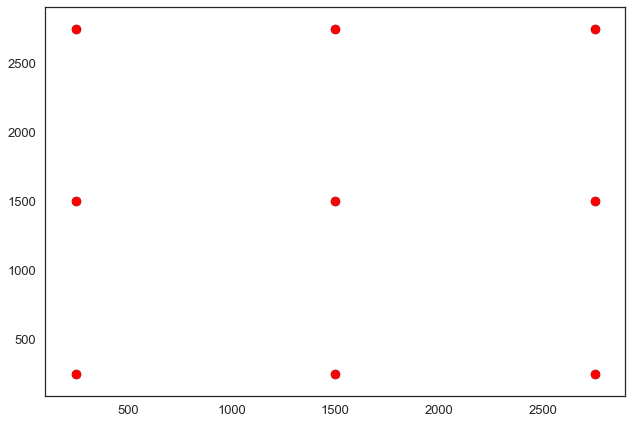

In [29]:
X, Y = np.meshgrid(xs, ys)
dip_X, dip_Y = np.meshgrid(xs, ys)

plt.scatter(X, Y)
plt.scatter(dip_X, dip_Y, color="red")

# Foliation Data

In [30]:
fols = []

for x in xs:
    for y in ys:
        #for l in range(2):
        l = 2
        fols.append(m1_ex.export_foliation_gempy(x, y, l))
            
foliations = fols[0]
for fol in fols[1:]:
    foliations = foliations.append(fol, ignore_index=True)
    
foliations.to_csv("example_2_folds_foliations.csv")

# Points Data

In [31]:
combo = []
for a in xs:
    for b in ys:
        print(a, b)
        combo.append((a,b))

250 250
250 1500
250 2750
1500 250
1500 1500
1500 2750
2750 250
2750 1500
2750 2750


In [32]:
XS, YS = list(zip(*combo))

In [33]:
points = m1_ex.export_interfaces_gempy(XS, YS, layers=list(range(2,7)))

points.to_csv("example_2_folds_interfaces.csv")

In [34]:
geo_data = gp.create_data([0,3000,0,3000,0,2000],[50,50,50],
                         path_f = "example_2_folds_foliations.csv",
                         path_i = "example_2_folds_interfaces.csv")

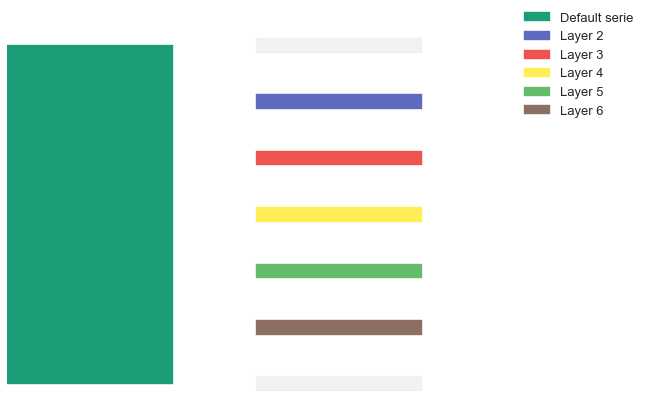

In [35]:
gp.set_series(geo_data, {'Default serie': ('Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6')},# , "Fault 0": ("Fault 0")},
              order_formations= ['Layer 2', 'Layer 3', 'Layer 4', 'Layer 5', 'Layer 6'])#, 'Fault 0'], verbose=2)

In [36]:

#fp_2 = pn.DataFrame([1000, 1500, 1750, "fault1", "fault1"], columns=['X', 'Y', 'Z', 'formation', 'series'])
#ff_1 = 

In [37]:
geo_data.foliations.dropna(inplace=True)

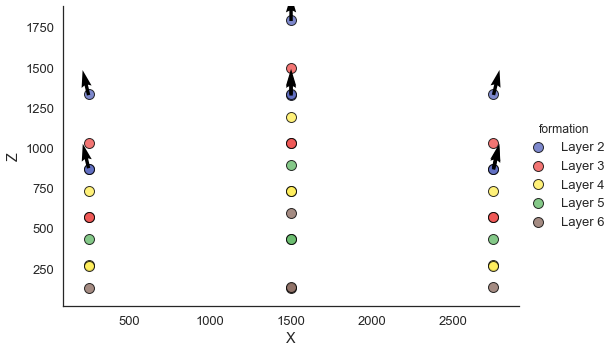

In [38]:
gp.plot_data(geo_data, direction="y")

In [39]:
interp_data = gp.InterpolatorInput(geo_data, dtype='float64')

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64


In [40]:
lb, fb = gp.compute_model(interp_data)

In [41]:
v, s = gp.get_surfaces(interp_data, potential_lith=lb[1])
gp.plot_surfaces_3D(geo_data, v, s)

In [96]:
import importlib
importlib.reload(gp.Visualization)

<module 'gempy.Visualization' from '../gempy\\gempy\\Visualization.py'>

In [90]:
gp.export_to_vtk(geo_data, path="vtk_test_export", lith_block=lb, vertices=v, simplices=s)

ModuleNotFoundError: No module named 'evtk'